In [36]:
library(rEDM)

In [19]:
#loading
dailyC <- read.csv("single_day_colonizedCounts.csv")

In [20]:
#check cols name
str(dailyC)


'data.frame':	5475 obs. of  2 variables:
 $ Time      : int  0 1 2 3 4 5 6 7 8 9 ...
 $ DailyCount: int  29 0 1 2 4 5 6 7 8 8 ...


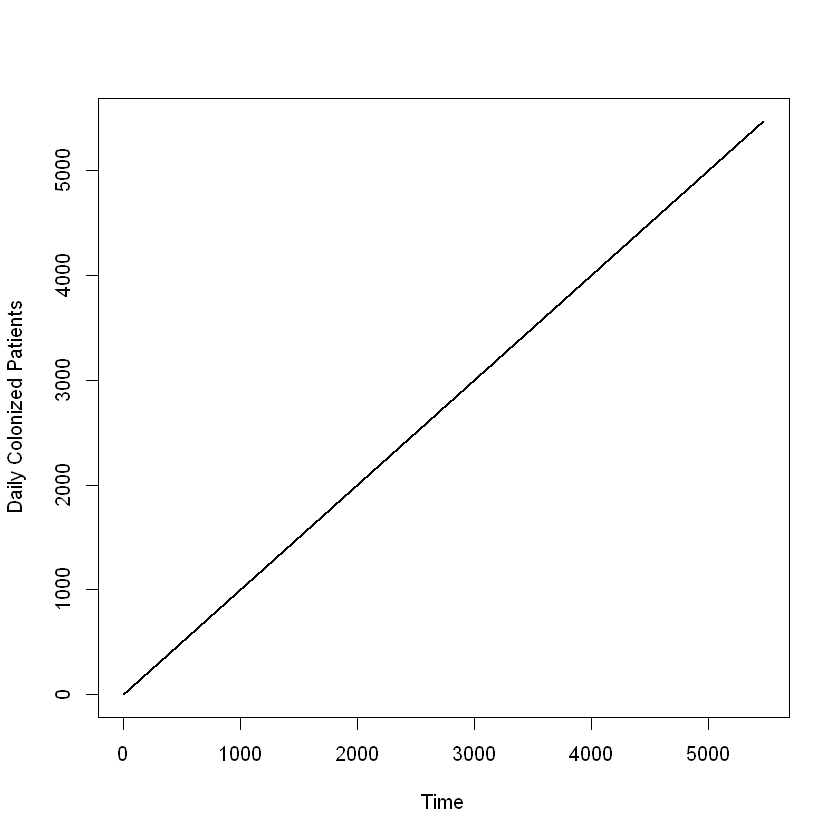

In [21]:
#showing original graph

# Create a new data frame with time and colonized count
df <- data.frame(
  time = dailyC $Time,
  dailyCount = dailyC $DailyCount
)

# Plot the colonized counts over time
plot(df$time, df$dailyCount, type = "l",
     xlab = "Time", ylab = "Daily Colonized Patients",
     lwd = 2)


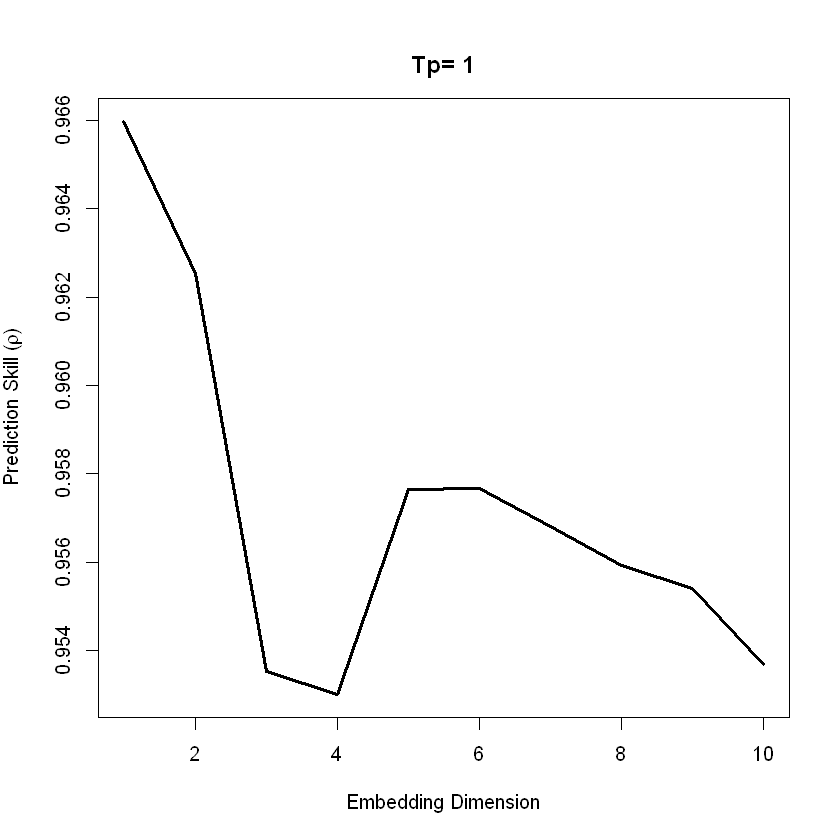

In [22]:

#Finding E by Optimal embedding dimension 
#only need minimum dimension

E.opt <- EmbedDimension(dataFrame = dailyC,
                       lib = "1 2500", 
                       pred = "2501 5475",
                       columns = "DailyCount",
                       target = "DailyCount")


In [23]:

#Predict Interval(replace the E with detected E at peak)
#run Simplex

simplex_out <- Simplex(dataFrame = dailyC,
                       lib = "1 2500", # training range
                       pred = "2501 5475",# prediction range
                       columns = "DailyCount",
                       target = "DailyCount",
                       E = 1)
simplex_out[c(1:2, 300:301), ] 


,Time,Observations,Predictions,Pred_Variance
,<dbl>,<dbl>,<dbl>,<dbl>
1,2500,35,NaN,NaN
2,2501,38,34.51515,2.593205
300,2799,28,29.11278,9.257957
301,2800,28,28.52000,3.353600


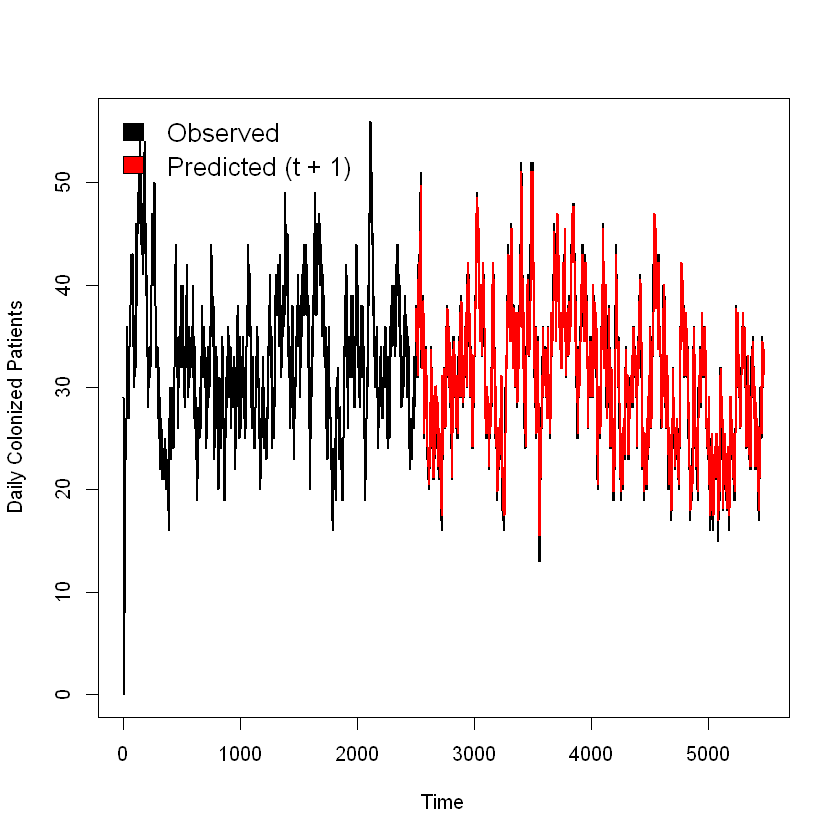

In [24]:

# Plot actual vs predicted colonized counts
plot(dailyC$Time, dailyC$DailyCount, type = "l", lwd = 2,
     xlab = "Time", ylab = "Daily Colonized Patients")

lines(simplex_out$Time, simplex_out$Predictions, col = "red", lwd = 2)

legend("topleft", legend = c("Observed", "Predicted (t + 1)"),
       fill = c("black", "red"), bty = "n", cex = 1.3)

# type “l” means line, lwd =2 means line width
# observed in black, predicted in red
#bty means no box around legend, cex means font size


In [25]:

#Evaluate performance
ComputeError(simplex_out$Observations, simplex_out$Predictions)



$MAE
[1] 1.39488

$rho
[1] 0.9659753

$RMSE
[1] 1.788803

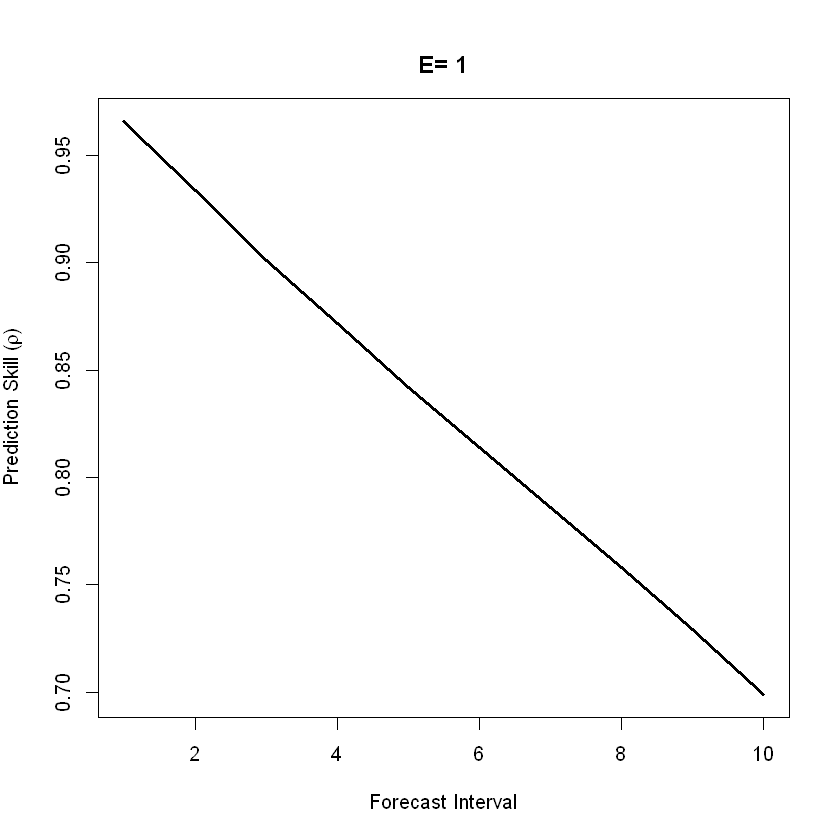

In [26]:

#prediction Decay(for short term is good, long term has decay in accuracy)
# Tp increases, p decreases as prediction decay, p drops to 0, then chaotic
# normal in nonlinear system
rho_Tp<- PredictInterval(dataFrame = dailyC, 
                       lib = "1 2500", 
                       pred = "2501 5475",
                         columns = "DailyCount",
                         target = "DailyCount",
E = 1) 


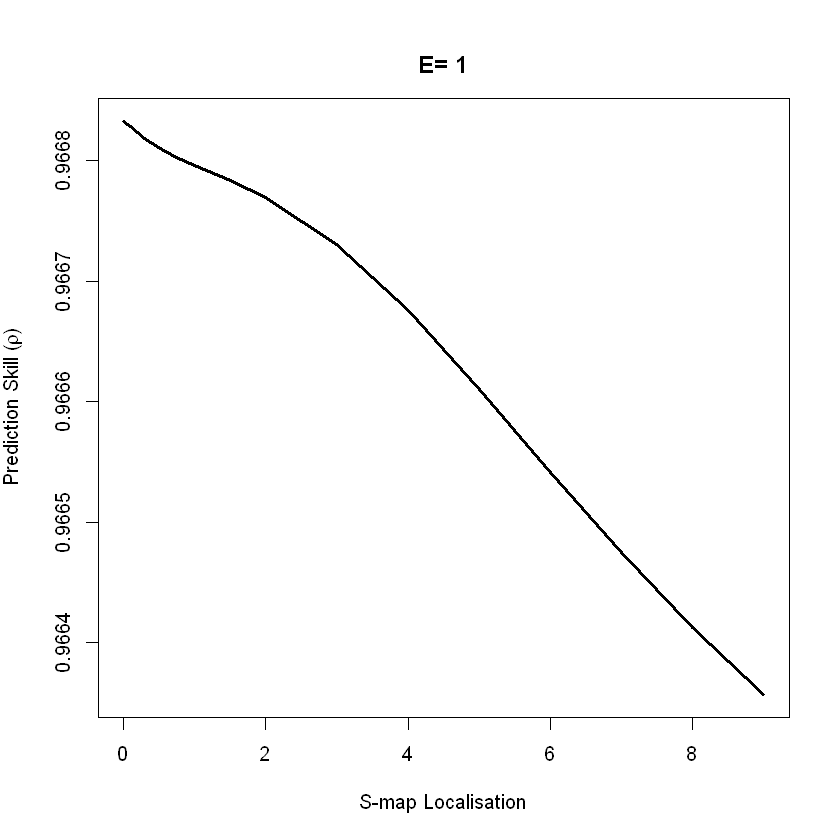

In [27]:
#Test for nonlinearity(Smap)
# If ρ increases as θ increases, the system likely has nonlinear behavior
# If ρ is highest at θ = 0, it's likely a linear or stochastic process

rho_theta  <- PredictNonlinear(dataFrame = dailyC,
                       lib = "1 2500", 
                       pred = "2501 5475",
                         columns = "DailyCount",
                         target = "DailyCount",
                              E = 1)


In [28]:
Smap  <- SMap(dataFrame = dailyC,
                       lib = "1 2500", 
                       pred = "2501 5475",
                         columns = "DailyCount",
                         target = "DailyCount",
                    E = 1,
                    theta = 3)

head(cbind(Smap$predictions, Smap$coefficients), 3)

tail(cbind(Smap$predictions, Smap$coefficients), 3) 


,Time,Observations,Predictions,Pred_Variance,Time,C0,∂DailyCount/∂DailyCount(t-0)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,2500,35,NaN,NaN,2500,NaN,NaN
2,2501,38,34.72745,9.207301,2501,0.3729009,0.9815584
3,2502,36,37.80074,13.874291,2502,1.0384608,0.9674285


,Time,Observations,Predictions,Pred_Variance,Time,C0,∂DailyCount/∂DailyCount(t-0)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2974,5473,31,30.10334,8.689757,5473,1.710790,0.9464183
2975,5474,34,31.07878,7.801669,5474,2.133996,0.9337029
2976,5475,NaN,33.79339,8.103197,5475,2.510903,0.9200730
